# OLA 1

## Exercise 1: Data Exploration and Cleaning

### Task 1. Find and Download a Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\miemt\AppData\Local\Temp\ipykernel_7840\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("../Data/titanic_train.csv", index_col=0)

df

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
...                                                        ...     ...   ...   
887                                      Montvila, Rev. Juozas    male  27.0   
888                               Graham, Miss. Margaret Edith  female  19.0   
889                   Johnston, Miss. Catherine Helen "Carrie"  female   NaN   
890                                      Behr, Mr. Karl Howell    male  26.0   
891                                        Dooley, Mr. Patrick    male  32.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S  
...            ...    ...               ...      ...   ...      ...  
887              0      0            211536  13.0000   NaN        S  
888              0      0            112053  30.0000   B42        S  
889              1      2        W./C. 6607  23.4500   NaN        S  
890              0      0            111369  30.0000  C148        C  
891              0      0            370376   7.7500   NaN        Q  

[891 rows x 11 columns]

### Task 2. Data Exploration:

In [3]:
df.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
df.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

### Task 3. Data Cleaning

In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
df['Age'] = df['Age'].interpolate(method='nearest')

In [8]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
# df = df.drop(columns=['Cabin'])

# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100

# Select columns with more than 50% missing values
columns_to_drop = missing_percentage[missing_percentage > 50].index

# Drop columns
df = df.drop(columns=columns_to_drop)

In [10]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


In [12]:
df = df.dropna(subset=['Embarked'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


In [15]:
df1 = df["Age"]

# Calculate mean and standard deviation for each column
mean = df1.mean()
std_dev = df1.std()

# Define a threshold as mean plus/minus a certain number of standard deviations
threshold = 1

# Remove outliers
df_filtered = df1[(df1 >= mean - threshold * std_dev) & (df1 <= mean + threshold * std_dev)]

In [16]:
df_filtered

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889    19.0
890    26.0
891    32.0
Name: Age, Length: 641, dtype: float64

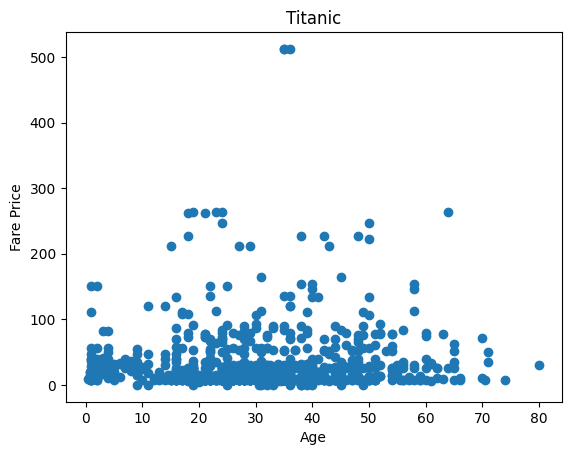

In [17]:
# Plot a scatter plot
plt.scatter(df['Age'], df['Fare'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Fare Price')
plt.title('Titanic')

# Display the plot
plt.show()

(array([ 71.,  57., 219., 203., 152.,  89.,  57.,  27.,  12.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

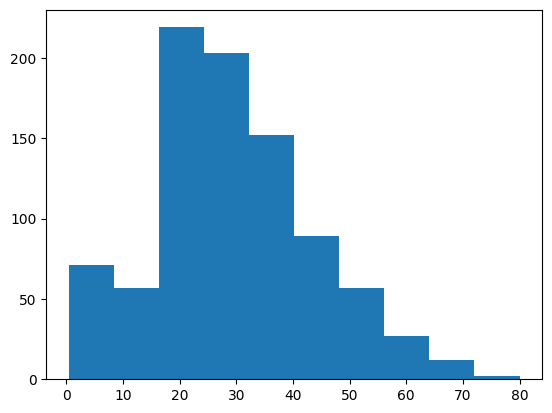

In [18]:
plt.hist(df.Age)

(array([732., 104.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

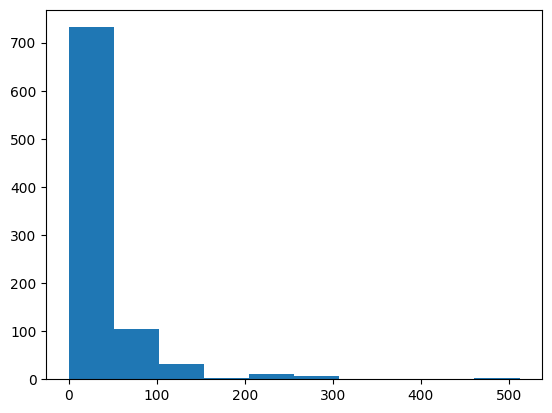

In [19]:
plt.hist(df.Fare)

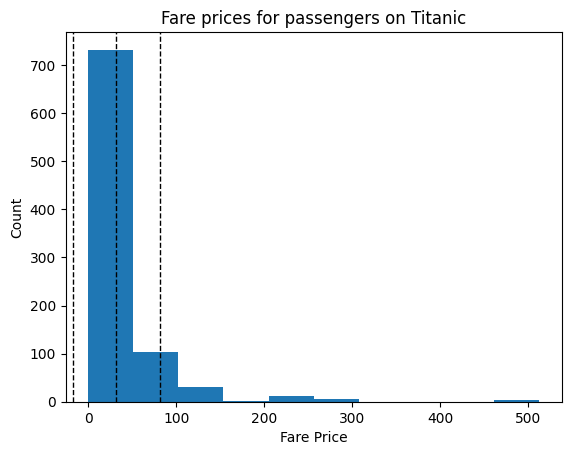

In [20]:
# Fare Histogram
plt.hist(df.Fare)
plt.axvline(df.Fare.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Fare prices for passengers on Titanic')
plt.ylabel('Count')
plt.xlabel('Fare Price')

# Add standard deviation markers
plt.axvline(df.Fare.mean()+df.Fare.std(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df.Fare.mean()-df.Fare.std(), color='k', linestyle='dashed', linewidth=1)

In [21]:
df1 = df[["Fare", "Survived", "Pclass", "Age", "SibSp", "Parch"]]

# Calculate mean and standard deviation for each column
mean = df1.mean()
std_dev = df1.std()

# Define a threshold as mean plus/minus a certain number of standard deviations
threshold = 3

# Remove outliers
df_filtered = df1[(df1 >= mean - threshold * std_dev) & (df1 <= mean + threshold * std_dev)]

Text(0.5, 0, 'Fare Price')

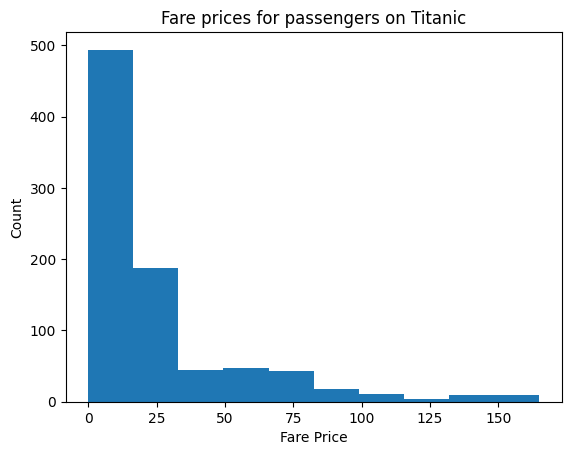

In [22]:
df_filtered = pd.DataFrame(df_filtered)

# Fare Histogram
plt.hist(df_filtered.Fare)
plt.title('Fare prices for passengers on Titanic')
plt.ylabel('Count')
plt.xlabel('Fare Price')


In [23]:
df_filtered

Fare  Survived  Pclass   Age  SibSp  Parch
PassengerId                                               
1             7.2500         0       3  22.0    1.0    0.0
2            71.2833         1       1  38.0    1.0    0.0
3             7.9250         1       3  26.0    0.0    0.0
4            53.1000         1       1  35.0    1.0    0.0
5             8.0500         0       3  35.0    0.0    0.0
...              ...       ...     ...   ...    ...    ...
887          13.0000         0       2  27.0    0.0    0.0
888          30.0000         1       1  19.0    0.0    0.0
889          23.4500         0       3  19.0    1.0    2.0
890          30.0000         1       1  26.0    0.0    0.0
891           7.7500         0       3  32.0    0.0    0.0

[889 rows x 6 columns]

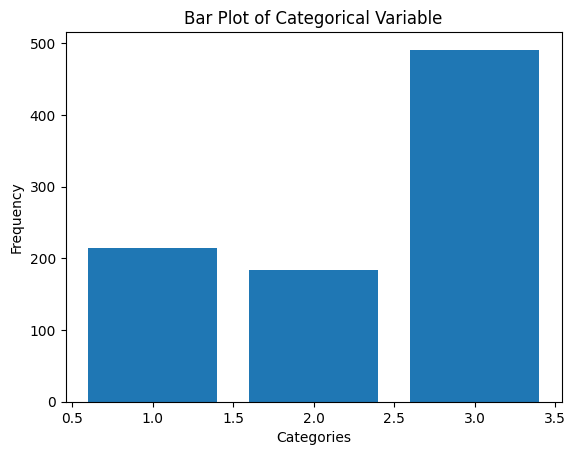

In [24]:
# Bar Plot using Matplotlib
plt.bar(df_filtered['Pclass'].value_counts().index, df_filtered['Pclass'].value_counts().values)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Bar Plot of Categorical Variable')
plt.show()

# Exercise 2: Feature Engineering and Descriptive Statistics

## Task 1: Feature Engineering

In [25]:
conditions = [
    (df['Age'] >= 0) & (df['Age'] <= 17),
    (df['Age'] > 17) & (df['Age'] <= 39),
    (df['Age'] > 39) & (df['Age'] <= 64),
    (df['Age'] > 64)
]
values = ['child', 'young adult', 'middle-aged', 'senior']

df['AgeCategory'] = np.select(conditions, values, default='unknown')

In [26]:
df[df['AgeCategory'] == 'middle-aged']

Survived  Pclass  \
PassengerId                     
7                   0       1   
12                  1       1   
16                  1       2   
30                  0       3   
31                  0       1   
...               ...     ...   
864                 0       3   
866                 1       2   
872                 1       1   
874                 0       3   
880                 1       1   

                                                         Name     Sex   Age  \
PassengerId                                                                   
7                                     McCarthy, Mr. Timothy J    male  54.0   
12                                   Bonnell, Miss. Elizabeth  female  58.0   
16                           Hewlett, Mrs. (Mary D Kingcome)   female  55.0   
30                                        Todoroff, Mr. Lalio    male  40.0   
31                                   Uruchurtu, Don. Manuel E    male  40.0   
...                                                       ...     ...   ...   
864                         Sage, Miss. Dorothy Edith "Dolly"  female  48.0   
866                                  Bystrom, Mrs. (Karolina)  female  42.0   
872          Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  female  47.0   
874                               Vander Cruyssen, Mr. Victor    male  47.0   
880             Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0   

             SibSp  Parch    Ticket     Fare Embarked  AgeCategory  
PassengerId                                                         
7                0      0     17463  51.8625        S  middle-aged  
12               0      0    113783  26.5500        S  middle-aged  
16               0      0    248706  16.0000        S  middle-aged  
30               0      0    349216   7.8958        S  middle-aged  
31               0      0  PC 17601  27.7208        C  middle-aged  
...            ...    ...       ...      ...      ...          ...  
864              8      2  CA. 2343  69.5500        S  middle-aged  
866              0      0    236852  13.0000        S  middle-aged  
872              1      1     11751  52.5542        S  middle-aged  
874              0      0    345765   9.0000        S  middle-aged  
880              0      1     11767  83.1583        C  middle-aged  

[191 rows x 11 columns]

In [27]:
one_hot = pd.get_dummies(df['AgeCategory'])
df = df.drop('AgeCategory',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
...                                                        ...     ...   ...   
887                                      Montvila, Rev. Juozas    male  27.0   
888                               Graham, Miss. Margaret Edith  female  19.0   
889                   Johnston, Miss. Catherine Helen "Carrie"  female  19.0   
890                                      Behr, Mr. Karl Howell    male  26.0   
891                                        Dooley, Mr. Patrick    male  32.0   

             SibSp  Parch            Ticket     Fare Embarked  child  \
PassengerId                                                            
1                1      0         A/5 21171   7.2500        S  False   
2                1      0          PC 17599  71.2833        C  False   
3                0      0  STON/O2. 3101282   7.9250        S  False   
4                1      0            113803  53.1000        S  False   
5                0      0            373450   8.0500        S  False   
...            ...    ...               ...      ...      ...    ...   
887              0      0            211536  13.0000        S  False   
888              0      0            112053  30.0000        S  False   
889              1      2        W./C. 6607  23.4500        S  False   
890              0      0            111369  30.0000        C  False   
891              0      0            370376   7.7500        Q  False   

             middle-aged  senior  young adult  
PassengerId                                    
1                  False   False         True  
2                  False   False         True  
3                  False   False         True  
4                  False   False         True  
5                  False   False         True  
...                  ...     ...          ...  
887                False   False         True  
888                False   False         True  
889                False   False         True  
890                False   False         True  
891                False   False         True  

[889 rows x 14 columns]

## Task 2: Descriptive Statistics 

In [28]:
df['Age'].std()

14.563357986365425

In [29]:
df['Age'].median()

28.0

In [30]:
df['Age'].mean()

29.57246344206974

In [31]:
df['Age'].describe()

count    889.000000
mean      29.572463
std       14.563358
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [32]:
new_df = df[['child', 'young adult', 'middle-aged', 'senior']].copy()
category_counts = new_df.sum()

category_counts

child          142
young adult    542
middle-aged    191
senior          14
dtype: int64

## Task 3: Visualization

<Axes: xlabel='Age'>

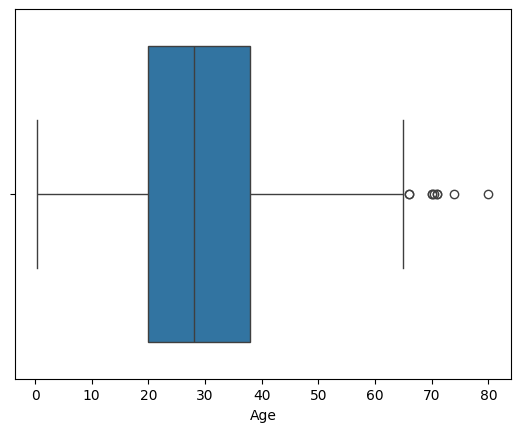

In [33]:
sns.boxplot(x = df['Age'])

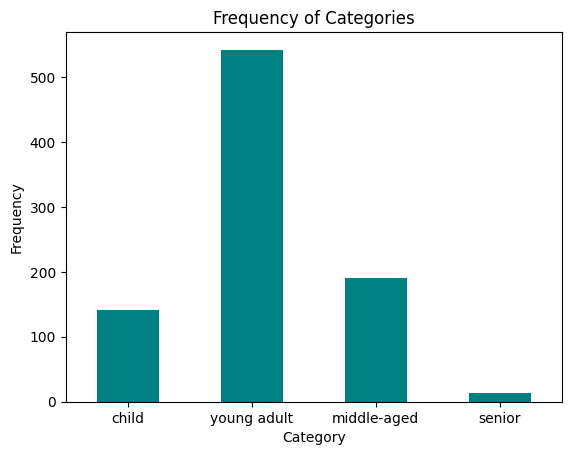

In [34]:
category_counts.plot(kind='bar', color='teal')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of Categories')
plt.xticks(rotation=0)
plt.show()

# Exercise 3: Data Wrangling and Analysis

## Task 1: Data Selection and Wrangling

A hypothetical question: *"Did more women than men survive the titanic?"*

In [51]:
survive = df.groupby("Sex")["Survived"].sum()
survive

Sex
female    231
male      109
Name: Survived, dtype: int64

## Task 2: Data Analysis

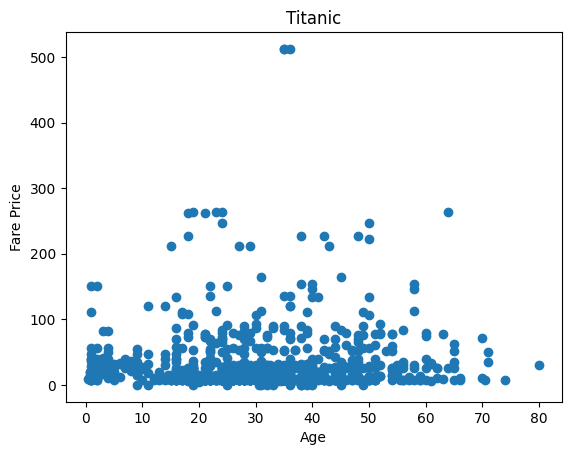

In [54]:
# Plot a scatter plot
plt.scatter(df['Age'], df['Fare'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Fare Price')
plt.title('Titanic')

# Display the plot
plt.show()

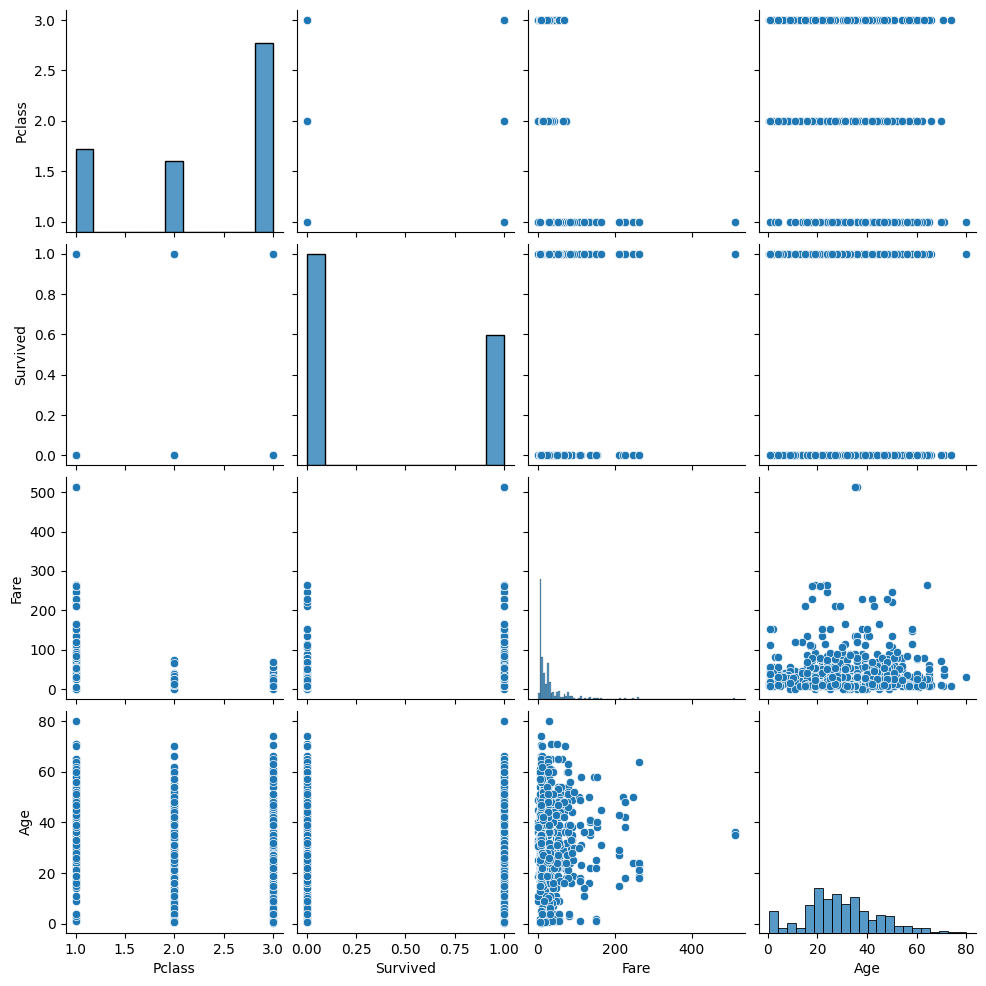

In [62]:
new_df = df[["Pclass", "Survived", "Sex", "Fare", "Age"]]
sns.pairplot(new_df)

## Task 3: Insights

Three insights:
1. Mostly passengers were about 20 to 40 years old
2. The majority of passengers traveled on third class
3. The majority of passengers died